### 1. Wykresy P(ruina gracza A) od p

Proszę zasymulować proces ruiny gracza z kapitałami początkowymi:
a = 50,  b = 50.

Z symulacji dla różnych wartości p (prawdopodobieństwo zabrania przez gracza A 1$ od gracza B) proszę narysować wykresy zależności prawdopodobieństwa ruiny gracza P(ruina A) od p.
Powinny to być co najmniej dwa wykresy uśrednione po różnych liczbach gier, małej i dużej (np. 10 i 1000).



In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def simulate_ruin(capital_a: int, capital_b: int, p: float) -> tuple[int, int]:
    """
    p - probability of player A taking 1$ from player B
    """
    while capital_a != 0 and capital_b != 0:
        if np.random.rand() < p:
            capital_a += 1
            capital_b -= 1
        else:
            capital_a -= 1
            capital_b += 1

    return capital_a, capital_b

In [15]:
result_a, result_b = simulate_ruin(50, 50, 0.5)
print(f"result:\nplayer a - {result_a}\nplayer b - {result_b}")

result:
player a - 0
player b - 100


Poniżej przedstawione są prawdopodobieństwa ruiny gracza A w zależności od prawdopodobieństwa zabrania 1$ przez gracza A od gracza B. Ponieważ wraz z "eksperymentami" okazało się, że przy szansie wygranej > 0.6 lub < 0.4, wynik jest właściwie przesądzony (dla > 0.6 - zawsze wygrana, dla < 0.4 - zawsze przegrana), skupiłem się tylko na wartościach pomiędzy (a przy okazji ładniej wygląda to na wykresie, bo jest mniej wartości do przedstawienia).

In [16]:
np.linspace(0.4, 0.6, 21)

array([0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ,
       0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ])

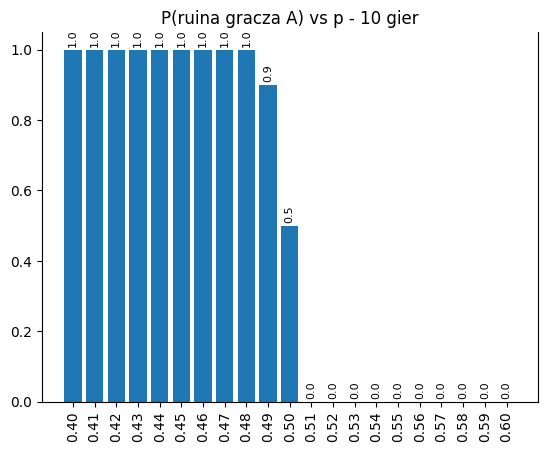

In [17]:
n_games = 10
capital_a = capital_b = 50

string_ps = [f"{p:.2f}" for p in np.linspace(0.4, 0.6, 21)]
ps = list(map(float, string_ps))
ruin_a_counts = np.zeros(len(ps))

for i, p in enumerate(ps):
    for _ in range(n_games):
        result_a, result_b = simulate_ruin(capital_a, capital_b, p)
        if result_a == 0:
            ruin_a_counts[i] += 1

ruin_a_probs = ruin_a_counts/n_games

plt.bar(string_ps, ruin_a_probs)
plt.xticks(rotation='vertical')
plt.gca().spines['top'].set_visible(False) # remove the top border
plt.title(f"P(ruina gracza A) vs p - {n_games} gier")
for index, value in enumerate(ruin_a_probs):
    plt.text(index, value + 0.015, 
             value, 
             ha='center', 
             fontsize=8, 
             rotation='vertical')

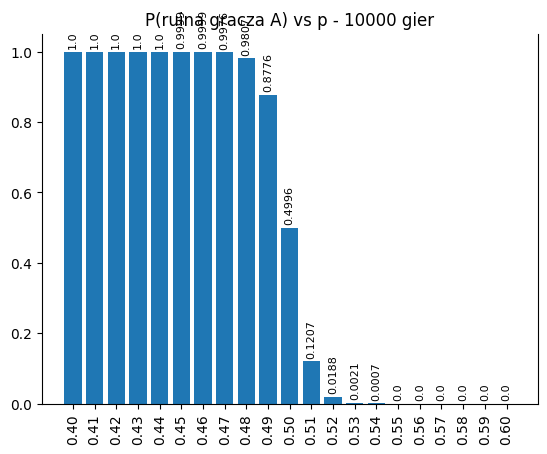

In [18]:
n_games = 10000
capital_a = capital_b = 50

string_ps = [f"{p:.2f}" for p in np.linspace(0.4, 0.6, 21)]
ps = list(map(float, string_ps))
ruin_a_counts = np.zeros(len(ps))

for i, p in enumerate(ps):
    for _ in range(n_games):
        result_a, result_b = simulate_ruin(capital_a, capital_b, p)
        if result_a == 0:
            ruin_a_counts[i] += 1

ruin_a_probs = ruin_a_counts/n_games

plt.bar(string_ps, ruin_a_probs)
plt.xticks(rotation='vertical')
plt.gca().spines['top'].set_visible(False) # remove the top border
plt.title(f"P(ruina gracza A) vs p - {n_games} gier")
for index, value in enumerate(ruin_a_probs):
    plt.text(index, value + 0.015, 
             value, 
             ha='center', 
             fontsize=8, 
             rotation='vertical')